# Machine Learning Quandl Example

https://www.youtube.com/watch?v=OGxgnH8y2NM&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=1

In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

%matplotlib inline

## Getting the data set 

In [2]:
df = quandl.get('WIKI/GOOGL')

df.head(5)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


## Redifining fields 

In [3]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

#         Price        x        x            x
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [4]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True) #Replace NaN values intead of delete the row

forecast_out = int(math.ceil(0.1*len(df))) #Round a value up into an integer type

df['label'] = df[forecast_col].shift(-forecast_out) #get the 34 next values in Adj. Close
df.dropna(inplace=True)

df.head(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,216.132179
2004-08-20,54.322689,0.710922,7.227007,22834300.0,212.977441
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,214.005615
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,210.725489
2004-08-25,53.164113,1.886792,1.183658,9188600.0,208.072299


## Model settings

In [5]:
X = np.array(df.drop(['label','Adj. Close'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
# It is not getting the last rows
#X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

## Testing diferent algorithms 

In [6]:
'''clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

#Save the training proccess in a pickle file
#We can run the train in a rented server then we can save this in a pickle file and destroy the server
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)'''

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

accuracy

In [ ]:
clf = svm.SVR()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

accuracy

In [ ]:
clf = svm.SVR(kernel='poly')
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

accuracy

## Sklearn Predition

In [7]:
pickle_in = open('linearregression.pickle','rb')
clf= pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)

In [8]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)
 
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

[544.66104932 540.85342642 546.76484093 530.76923846 519.20050039
 541.21845002 540.34001792 546.35890284 548.05825524 537.47033047
 543.14292378 543.52792158 542.86849242 542.80410981 545.62463502
 538.73703524 548.73894417 545.91308944 532.32853886 528.86028834
 506.47997372 535.35054308 475.03269408 361.73225491 486.86500092
 507.69136654 508.00900077 520.36542808 518.04919084 521.67036747
 541.20307325 537.86793041 533.78981796 543.69464478 539.54271012
 548.78594363 537.56361399 536.90549542 546.8470271  543.40718696
 488.63897399 522.63196952 541.00232016 543.41410801 544.53138907
 547.36374385 527.7040294  530.35855706 515.23193512 470.65957087
 536.87803141 493.11492696 523.41863889 540.01312139 545.00212235
 533.42687342 534.12169394 548.27243076 536.62298842 534.55245543
 542.35056683 542.98212674 536.59637577 544.554132   536.64956877
 546.00131945 531.29216082 514.23346389 535.37688528 526.97102554
 545.54522318 534.17264303 541.70049395 541.93512236 539.05551545
 524.93120

## Dates on the Axis

In [9]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df.tail(5)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2017-09-19 17:00:00,NaN,NaN,NaN,NaN,NaN,552.165828
2017-09-20 17:00:00,NaN,NaN,NaN,NaN,NaN,545.430070
2017-09-21 17:00:00,NaN,NaN,NaN,NaN,NaN,550.675478
2017-09-22 17:00:00,NaN,NaN,NaN,NaN,NaN,550.967963
2017-09-23 17:00:00,NaN,NaN,NaN,NaN,NaN,530.438294


Text(0,0.5,'Price')

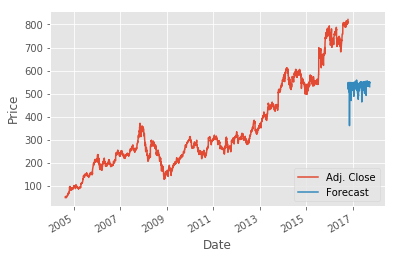

In [10]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

#It's getting weekends and the main data doesn't